<h1><center>
<img align="middle" style="display: inline;" src="figs/cds_log.png" alt="logo" width="250px" hspace="20"/>
<img align="middle" style="display: inline;" src="figs/inria_logo.png" alt="logo" width="100px" hspace="20"/>
<img align="middle" style="display: inline;" src="figs/usc_logo.png" alt="logo" width="150px"/>
<img align="middle" style="display: inline;" src="figs/aws_powered_by_logo.jpeg" alt="logo" width="100px"/>
</center>
</h1>

<font color='red'>TODO: add better quality logos, add relative link to github </font> 


<div style="text-align: center">
<img src="figs/stroke_logo.png" width="350px" />
</div>

# <center> RAMP: segmentation of the brain lesions </center>

<br>
<div style="text-align: left">
    <em>
        <i><b>Authors: </b>Maria Teleńczuk, Swetha Shanker, Guillaume Lemaitre, Alexandre Gramfort</i>
        <a href="http://www.datascience-paris-saclay.fr">Paris-Saclay Center for Data Science</a> (Inria), France<br>
    </em>
    <em>  
        <i>Sook-Lei Liew</i>
        <a href="https://chan.usc.edu/npnl/">Neural Plasticity & Neurorehabilitation Lab</a> (USC), USA<br>
        </em>
        
</div>

# Table of contents
1. [Introduction](#Introduction)
3. [Submission](#Submission) 

# Introduction <a class="anchor" id="Introduction"></a>

## Clinical/research motivation

Stroke is the leading cause of adult disability worldwide, with up to two-thirds of individuals experiencing long-term disabilities. Large-scale neuroimaging studies have shown promise in identifying robust biomarkers (e.g., measures of brain structure) of long-term stroke recovery following rehabilitation. However, analyzing large rehabilitation-related datasets is problematic due to barriers in accurate stroke lesion segmentation. Manually-traced lesions are currently the gold standard for lesion segmentation on T1-weighted MRIs, but are labor-intensive, time consuming, and require anatomical expertise and training. Manual segmentation can also be subjective. While algorithms have been developed to automate this process, the resulting lesion masks often lack the accuracy needed to make them viable solutions. However, newer algorithms that employ machine-learning and deep learning techniques are promising avenues, but they require large, diverse datasets for training and testing and developing generalizable models. In this challenge, training can be performed on our public ATLAS 2.0 dataset, and testing is done with a hidden private dataset comprised of multi-site data from the same sites as ATLAS 2.0. <BR>

For more information rever to:
<a href="http://fcon_1000.projects.nitrc.org/indi/retro/atlas.html">Anatomical Tracings of Lesions After Stroke</a>

## References

<a href="https://www.sciencedirect.com/science/article/abs/pii/S1361841516301268">1. Maier, Oskar, et al. "ISLES 2015-A public evaluation benchmark for ischemic stroke lesion segmentation from multispectral MRI." Medical image analysis 35 (2017): 250-269.</a><br>

<a href="https://www.nature.com/articles/sdata201811">2. Liew, Sook-Lei, et al. "A large, open source dataset of stroke anatomical brain images and manual lesion segmentations." Scientific data 5 (2018): 180011.</a><br>


## Objective of the challenge

In this challenge you will be given 3D medical images (T1 MRI scans in `nii.gz` format) of the stroke patients and the files with the corresponding lesions (binary masks) traced by hand by experts. Your algorithm will be scored on the precision. Before we look closer at the data, let's import all the necessary libraries (feel free to skip it if you have done it already):

# Imports

### Prerequisites

- Python >= 3.7
- [nilearn](https://nilearn.github.io/)
- [numpy](https://pypi.org/project/numpy/)
- [osfclient](https://github.com/osfclient/osfclient)  # used for downloading the data
- [scipy](https://pypi.org/project/scipy/)
- [pandas](https://pypi.org/project/pandas/)
- [scikit-learn](https://pypi.org/project/scikit-learn/)
- [matplolib](https://pypi.org/project/matplotlib/)
- [jupyter](https://pypi.org/project/jupyter/)
- [ramp-workflow](https://pypi.org/project/ramp-workflow/)
- [ramp-utils](https://github.com/paris-saclay-cds/ramp-board/)

The following cell will install the required pacakge dependencies, if necessary.

In [1]:
import sys
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install ramp-workflow
!{sys.executable} -m pip install ramp-utils

To get this notebook running and test your models locally using `ramp-test` (from ramp-workflow), we recommend that you use the Anaconda or Miniconda Python distribution.

# Data exploration

## Download the data (optional)

<font color='red'>TODO: update the loading of the data and the exact data samples in the examples </font> 

If the data has not yet been downloaded locally, uncomment the following cell and run it.

<font color='red'>Note: Please be patient, the data is large. </font>

<font color='red'>TODO: how large is the data to download? </font> 

In [2]:
# !python download_data.py

You should now be able to find the test and train folders in the data/ directory

## Viewing the data files

<font color='red'>TODO: assure the below is correct after changing the dataset </font>

In your `data` folder you should now be able to find the directories with names: `subject_1`, `subject_2` and so on. Inside each of them you will find two files: `T1.nii.gz` and `truth.nii.gz`:
 - `T1.nii.gz` is a file with a 3D T1 (MRI) brain scan of the patient
 - `truth.nii.gz` is a file with the binary mask of the same size as T1 image. 0 corresponds to no lesion, 1 corresponds to the lesion. The true lesions where traced by the experts by hand

If you wish to view any of those files from outside of Python, there are many applications available online. For example you might want to use [ITK-snap](http://www.itksnap.org/pmwiki/pmwiki.php). There, you can load the `T1.nii.gz` as a Main Image and `truth.nii.gz` as a Segmentation to overlap the two. Here, we won't go into the details of how to use ITK-snap.

To load the images to Python, we will be using [Nilearn](https://nilearn.github.io/) Python library, but there are other possible options so feel free to choose your favorite one (if, for your submission, you will want to use a libarary which is not listed within the `requirements.txt` or `extra_libraries.txt` files please make a pull request to the the [Stroke Lesion Segmentation Challenge repository on github](https://github.com/ramp-kits/stroke) by adding the required library to [extra_libraries.txt](https://github.com/ramp-kits/stroke/blob/master/extra_libraries.txt) file).

## View data

[MRI](https://en.wikipedia.org/wiki/Magnetic_resonance_imaging#:~:text=Magnetic%20resonance%20imaging%20(MRI)%20is,the%20organs%20in%20the%20body.) is short for the Magnetic Resonance Imaging. MRI images consist of scans of the brain at different depths and then combined together to form the 3d image of the brain. 

Let's view few some of the images:

In [3]:
path_T1_1 = 'data/train/1_T1.nii.gz'
path_T1_2 = 'data/train/2_T1.nii.gz'
path_T1_3 = 'data/train/3_T1.nii.gz'

path_lesion_1 = 'data/train/1_lesion.nii.gz'
path_lesion_2 = 'data/train/2_lesion.nii.gz'
path_lesion_3 = 'data/train/3_lesion.nii.gz'

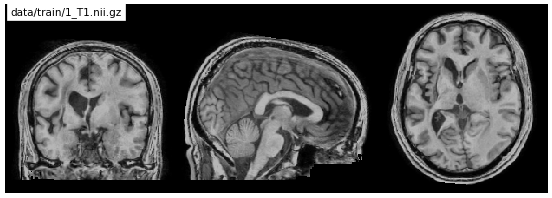

In [4]:
%matplotlib inline

from nilearn import plotting
import os
import matplotlib.pylab as plt

def plot_t1(path_to_t1, title='T1'):
    fig = plt.figure(1, figsize=(14, 5), frameon=False, dpi=50)
    ax = plt.gca()
    plotting.plot_anat(path_to_t1, title=title,
                       axes=ax,
                       draw_cross=False,
                       annotate=False,
                       cut_coords=(0, 0, 0)
                       )
plot_t1(path_to_t1=path_T1_1, title=f'{path_T1_1}')

<font color='red'>TODO: choose the images with 1) no visible lesion; 2) small lesion; 3) large lesion </font>

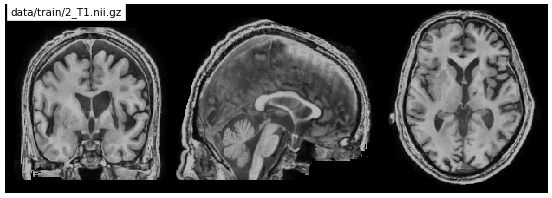

In [5]:
plot_t1(path_to_t1=path_T1_2, title=f'{path_T1_2}')

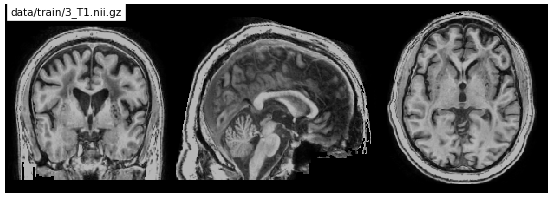

In [6]:
plot_t1(path_to_t1=path_T1_3, title=f'{path_T1_3}')

We plotted the T1 image for three different patients shown at three different axes. Some preprocessing has been done to them already. If you are interested, you can check the preprocessing steps in [here](https://www.nature.com/articles/sdata201811).

Can you already make some guesses on where the lesions are located?

Before we look closer at the lesions, let's look at the size of the images

In [7]:
from nilearn.image import load_img
    
img1 = load_img(path_T1_1)
img2 = load_img(path_T1_2)
img3 = load_img(path_T1_3)

print(f"Shape of the first T1 scan is: {img1.shape}, "
      "of the second: {img2.shape}, of the third: {img3.shape}")

Shape of the first T1 scan is: (197, 233, 189), of the second: {img2.shape}, of the third: {img3.shape}


Here we checked the sizes of only three of the scans, but if you look at the others you will notice that they all have the same size. This is because one of our preprocessing steps was to normalize all of the data to MNI space. 

Now, look closer at the images which we plotted above: even though the brains were normalized into the common space you can easily notice differences between them. 

By normalizing to the MNI space we are trying to align and warp the brain to match the template brain. This also leads to normalization of the size of the image, hece the same shape of all the scans we have here.

If you find it useful you can use the MNI brain which we used in the preprocessing. You can find it here:
<font color='red'>TODO: add link to the MNI brain used (Lei?) </font>

## Lesion analysis

Now, that we understand better the anatomical T1 images that we will work with, let's look at the lesion masks. We will visualize overlap of the two:

In [8]:
from nilearn.image import load_img

/home/maja/anaconda3/envs/stroke/lib/python3.8/site-packages/numpy/ma/core.py:2831: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


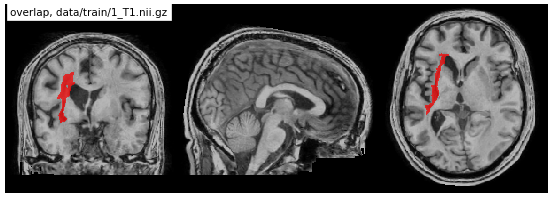

In [9]:
def plot_overlap(path_to_t1, path_to_lesion, title='overlap'):
    fig = plt.figure(1, figsize=(14, 5), frameon=False, dpi=50)
    ax = plt.gca()
    plotting.plot_roi(path_to_lesion, path_to_t1, title=title,
                       axes=ax,
                       draw_cross=False,
                       annotate=False, 
                       cmap='autumn',  # the lesions will be shown in red
                       cut_coords=(0, 0, 0)
                       )
plot_overlap(path_to_t1=path_T1_1,
             path_to_lesion=path_lesion_1,
             title=f'overlap, {path_T1_1}')

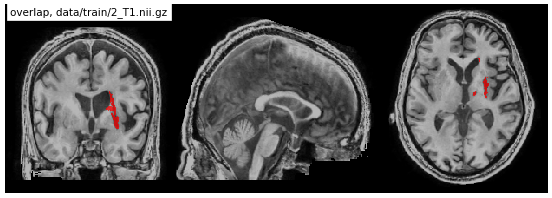

In [10]:
plot_overlap(path_to_t1=path_T1_2,
             path_to_lesion=path_lesion_2,
             title=f'overlap, {path_T1_2}')

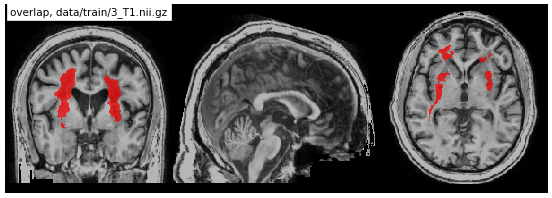

In [11]:
plot_overlap(path_to_t1=path_T1_3,
             path_to_lesion=path_lesion_3,
             title=f'overlap, {path_T1_3}')

Did you guess correctly the locations of the lesions? What else did you notice?

Probably the most noticable thing is that the lesions are not of the same size nor they are in the same location. In one of the subjects, the lesion is not even in the plane that we are looking at, or is it there at all?

Feel free to also look at the data of other subjects. You can view different planes by changing `cut_coords` parameter.

Lets now look at the voxel sizes of the lesions of some patients (here we will consider only 100 of them). First we will find all the paths to the truth and lesions in our `train` directory:

In [12]:
import glob
import numpy as np

t1_name = '*T1.nii.gz'
lesion_name = '_lesion.nii.gz'

# list_subj_dirs_train = os.listdir(dir_data_train)
def find_data_pairs(data_dir, data_type='.nii.gz'):
    t1_names = glob.glob(os.path.join(data_dir, t1_name))
    X_path = []
    y_path = []
    for t1_next in t1_names:
        X_path.append(t1_next)
        y_path.append(t1_next[:-(len(t1_name))]+lesion_name)
    return X_path, y_path

data_dir = 'data/train'  # path to your data directory
#data_dirs = os.listdir(data_dir)
Xpatsh, ypaths = find_data_pairs(data_dir, data_type='.nii.gz')

There are:  149  lesion files, with smallest lesion:  16.0  and largest:  188610.0  of voxels.


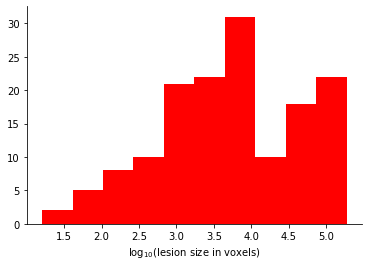

In [13]:
lesion_sizes = np.empty(len(ypaths))
for idx, lesion_path in enumerate(ypaths):
    truth = load_img(lesion_path)
    truth_data = truth.get_fdata()
    truth_size = int(np.sum(truth_data))
    lesion_sizes[idx] = truth_size
    
    del truth, truth_data

fig, ax = plt.subplots()
ax.hist(np.log10(lesion_sizes), bins=10, color='red')
ax.set_xlabel('$\log_{10}$(lesion size in voxels)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

print('There are: ', len(ypaths),
      ' lesion files, with smallest lesion: ', np.min(lesion_sizes),
      ' and largest: ', np.max(lesion_sizes), ' of voxels.')

<font color='red'>TODO: Make sure there are no lesions of size 0 in the actual data. Adjust the above plot once the correct data is available  </font> 

The sizes of the lesions vary a lot between patients.

<font color='red'>Note: All the images include at least a small lesion. </font> 

# Sample prediction algorithms

To get familiar with the way we expect you to submit your algorithm we will now go through some sample/ dummy solutions. 

## Dummy solution (predict only 1s)

In the path of this challenge you can find a directory called `submissions/sample`. If you want to test your solution locally you will need to place your submission directory in the `submissions` folder, eg `submissions/my_submission`. There, you will need to have a python file called `estimator.py`. Let's look at the `submissions/sample/estimator.py`:

In [14]:
# %load submissions/sample/estimator.py
from nilearn.image import load_img
import numpy as np

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.base import ClassifierMixin
from sklearn.pipeline import Pipeline


class Dummy(BaseEstimator, ClassifierMixin, TransformerMixin):
    def fit(self, X, y):
        return self

    def predict_proba(self, X):
        # returns y filled with only 1s

        x_path = X[0]
        x_data = load_img(x_path)
        x_shape = x_data.shape
        y = np.ones((len(X), x_shape[0], x_shape[1], x_shape[2]))

        return y


def get_estimator():

    # sets all the prediction to only 1s
    dummy = Dummy()

    pipeline = Pipeline([
        ('classifier', dummy)
    ])

    return pipeline


You can test this or any other submission with the command (in your terminal):

`ramp-test --submission <your submission folder name> --quick-test`

`--quick-test` tells RAMP to use only 5 subjects from the dataset. Omit this option if you wish to train on the whole dataset (this will take more time)

RAMP will be searching for the function `get_estimator()` within your `estimator.py` file. This function needs to return [Sklearn type of pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).

So how does it work?

RAMP will use functions `get_train_data()` and `get_test_data()` which are found in the `problem.py` file in current challenge directory (you are free to view this file, but you will not be able to submit other version of it). Those functions will return `X` and `y` data. 

`X` is an array which stores the paths to the `T1.nii.gz` (we are not loading them all to the memory as you might find it more efficient to work with each of them separately or with small batches of data). In our Dummy algorithm above we are loading the data using `load_img()` function from `nilearn.image`. 


`y` is an array with four dimensions: `n_samples` x `x_len` x `y_len` x `z_len` where `x_len`, `y_len` and `z_len` are dimensions of the MRI scans. In the Dummy algorithm we are not using `y` for trainining (ie in `fit()`), however test `y` data is compared to your solution and used to score the output.

Let's go step by step through what happens:

Load the train dataset (we will load only data for 5 subjects):

In [150]:
def get_data(xy_paths):
    xs, ys = xy_paths
    # use only 3 subjects here
    limit_samples = 100
    n_samples = min(len(xs), limit_samples)
    X = xs[:n_samples]
    for idx in range(n_samples):
        if idx == 0:
            # check the shape of the data (we know that all the scans
            # have the same shape)
            y = load_img(ys[idx]).get_fdata()
            _x_len, _y_len, _z_len = np.shape(y)
            y = np.empty((n_samples, _x_len, _y_len, _z_len))
        y[idx, :] = load_img(ys[idx]).get_fdata()
    return X, y

dir_data_train = 'data/train'
list_subj_dirs_train = find_data_pairs(dir_data_train)

X_train, y_train = get_data(list_subj_dirs_train)

explain potential possiblity to use AWS services/ limits

In [16]:
print(f'X_train is a {type(X_train)} with {len(X_train)} elements: \n{X_train}\n')
print(f'y_train is a {type(y_train)} of shape: {y_train.shape}.')
print(f'Its unique elements are {np.unique(y_train)}')

X_train is a <class 'list'> with 3 elements: 
['data/train/112_T1.nii.gz', 'data/train/94_T1.nii.gz', 'data/train/119_T1.nii.gz']

y_train is a <class 'numpy.ndarray'> of shape: (3, 197, 233, 189).
Its unique elements are [0. 1.]


Although, RAMP will use cross validation to train and test your data we will not showcase it here. However note, that when testing your algorithm locally you will see a score for each of your cross validation steps and the combined score in the end.

Here we will directly fit the algorithm of all our loaded train data:

In [17]:
dummy_pipe = get_estimator()
dummy_pipe.fit(X_train, y_train)

Pipeline(steps=[('classifier', Dummy())])

Now we will load the test dataset. Here, we will limit it to 3 images.

In [18]:
dir_data_test = 'data/test'
list_subj_dirs_test = find_data_pairs(dir_data_test)

X_test, y_test = get_data(list_subj_dirs_test)

In [19]:
print(f'X_test is a {type(X_test)} with {len(X_test)} elements: \n{X_test}\n')
print(f'y_test is a {type(y_test)} of shape: {y_test.shape}.')
print(f'Its unique elements include {np.unique(y_test)}')

X_test is a <class 'list'> with 3 elements: 
['data/test/173_T1.nii.gz', 'data/test/211_T1.nii.gz', 'data/test/189_T1.nii.gz']

y_test is a <class 'numpy.ndarray'> of shape: (3, 197, 233, 189).
Its unique elements include [0. 1.]


Now we will get predicted `y`:

In [20]:
y_pred = dummy_pipe.predict_proba(X_test)

In [21]:
print(f'y_pred is a {type(y_pred)} of shape: {y_pred.shape}.')
print(f'Its unique elements include {np.unique(y_pred)}')

y_pred is a <class 'numpy.ndarray'> of shape: (3, 197, 233, 189).
Its unique elements include [1.]


It is what we expected. `y_pred` is of the same shape as `y_test` and it includes only 1s.

What RAMP is doing next is scoring the predictions. The score which RAMP is using for this challenge is defined in the `problem.py` file: 

## Scores used
- <b>Dice’s coefficient (DC)</b>: describes the volume overlap between two segmentations and is sensitive to the lesion size; read more in [Wikipedia](https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient). It ranges between 0 and 1 with 1 being a maximum score.
- <b>Precision</b>: the ability not to label as truth location which is not true; read more in [Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html). It ranges between 0 and 1 with 1 being a maximum score.
- <b>Recall</b>: measures true positive rate; read more in [Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html?highlight=recall#sklearn.metrics.recall_score). It ranges between 0 and 1 with 1 being a maximum score.
- <b>Hausdorff Distance</b>: a measure of the maximum surface distance, hence especially sensitive to outliers maximum of all surface distances; read more in [Wikipedia](https://en.wikipedia.org/wiki/Hausdorff_distance). It ranges between 0 and inifinty with 0 being a best score.
<font color='red'>TODO: are we going to use Hausdorff? really slow!  </font> 
- <b>Absolute Volume Difference (AVD)</b>: It ranges between 0 and 1 with 0 being a best score.

In [22]:
from problem import DiceCoeff, Precision, Recall
from problem import HausdorffDistance, AbsoluteVolumeDifference

dice_coeff = DiceCoeff()
precision = Precision()
recall = Recall()
# hausdorff = HausdorffDistance()  # takes very long time
avd = AbsoluteVolumeDifference()

In [23]:
dice_dummy = dice_coeff(y_test, y_pred)
print(f'DiceCoeff for Dummy algorithm is {np.round(dice_dummy, 4)}')

DiceCoeff for Dummy algorithm is 0.0036


In [24]:
precision_dummy = precision(y_test, y_pred)
print(f'Precision for Dummy algorithm is {np.round(precision_dummy, 4)}')

Precision for Dummy algorithm is 0.0018


In [25]:
recall_dummy = recall(y_test, y_pred)
print(f'Recall for Dummy algorithm is {np.round(recall_dummy, 4)}')

Recall for Dummy algorithm is 1.0


In [26]:
avd_dummy = avd(y_test, y_pred)
print(f'AbsoluteVolumeDifference for Dummy algorithm is {np.round(avd_dummy, 4)}')

AbsoluteVolumeDifference for Dummy algorithm is 0.9982


This is the score which you should get when testing locally using

`ramp-test --submission <your submission folder name> --quick-test`

If you submit the Dummy solution on RAMP the score might vary slightly because for testing your algorithm RAMP will use different dataset, precisely:

`ramp-test --submission sample --quick-test`

## A (slightly) more complex algorithm

In the today's world when one think of image segmentation they instantly associate it with deep learning algorithms. We do support deep learning solutions. Each of the algorithms submitted to this challenge will be trained on the AWS instances with access to a GPU.

<font color='red'>Note that there is a limit allocated to each participant:</font>
<font color='red'>

<font color='red'>1. TODO: add max number of submissions</font>
    
<font color='red'>2. TODO: hours of GPU time per submission allocated to each participant</font>
    
<font color='red'>3. TODO: frequency of allowed submissions</font>

However, we will first try more classical machine learning solution. We will consider different features of each of the pixel.

You probably realized that we are using a lot of pixels which we do not even want to classify: those outside of the brain. Now we will draw all the 0s in the anatomical image in green and all the others in gray:

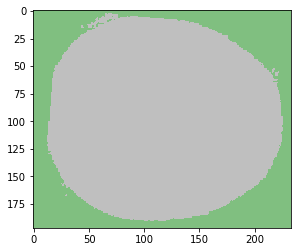

In [27]:
from matplotlib import colors
img1_array = img1.get_fdata()

cmap_nobrain = colors.ListedColormap(['green','gray'])

img1_array[np.abs(img1_array) > 0] = 1
plt.imshow(img1_array[:, :, 100], cmap=cmap_nobrain,
           interpolation='none',
           alpha=0.5)

It seems reasonable to completely ignore all the voxels which in the anatomical T1 scan are 0.

We will use functions from [Scikit-Learn](https://scikit-learn.org/stable/) and [Scikit-Image](https://scikit-image.org/) Python libraries.
This solution is partly reused from [here](https://eoss-image-processing.github.io/2020/06/24/trainable-segmentation.html).

In [28]:
# %load submissions/starting_kit/estimator.py
from nilearn.image import load_img
import numpy as np

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from skimage import filters


class FeatureExtractor(BaseEstimator, TransformerMixin):

    def _get_average(self, X):
        for idx, x_path in enumerate(X):
            x_data = load_img(x_path).get_fdata()

            if idx == 0:
                x_avg = x_data
            else:
                x_avg += x_data
        x_avg = x_avg / (idx + 1)  # make average
        return x_avg

    def _singlescale_basic_features(self, X, sigma, intensity=True,
                                    edges=True,
                                    avg_subtract=True):
        """ Features for a single value of the Gaussian blurring parameter
            ``sigma``
            simplified from version written by:
                Nicholas Esterer and Emmanuelle Gouillart
        """
        for idx, x_path in enumerate(X):
            features = []
            img = load_img(x_path).get_fdata()
            img_blur = filters.gaussian(img, sigma)

            # intensity:
            img_blur_reshaped = img_blur.reshape((1, -1))
            features.append(img_blur_reshaped)

            # edges:
            features.append(filters.sobel(img_blur).reshape(1, -1))

            # average subtract
            features.append((img - self._x_avg).reshape(1, -1))
            # as the last feature add the average brain
            # this will be used to remove all 0s (supposedly what's around
            # the brain)
            features.append(self._x_avg.reshape(1, -1))
            features = np.array(features)
            features = features.reshape((4, -1))

            # average brain
            if not idx:
                features_x = features
            else:
                features_x = np.hstack([features_x, features])
        return features_x

    def fit(self, X, y):
        self._x_avg = self._get_average(X)
        return self

    def transform(self, X):
        features = self._singlescale_basic_features(X=X, sigma=0.2)
        return features


class PointEstimator(BaseEstimator):

    def fit(self, X, y):
        _nonzero_indices = X[-1] != 0

        # remove the last, average feature
        _X_no_zeros = X[:-1, _nonzero_indices]

        self.img_shape = y.shape[1:]
        y = y.reshape((1, -1))
        _y_no_zeros = y[:, _nonzero_indices]
        self.clf = LogisticRegression(class_weight="balanced")
        self.clf.fit(_X_no_zeros.T, _y_no_zeros.ravel())
        return self

    def predict(self, X):
        # remove 0s from average train data (4th feature)
        _nonzero_indices = X[-1] != 0
        _X_no_zeros = X[:-1, _nonzero_indices]

        _y_pred_no_zeros = self.clf.predict(_X_no_zeros.T)
        y_pred = np.zeros(len(X[0]))
        y_pred[_nonzero_indices] = _y_pred_no_zeros
        y = y_pred.reshape(-1, self.img_shape[0],
                           self.img_shape[1],
                           self.img_shape[2])
        return y


def get_estimator():

    extractor = FeatureExtractor()
    point_estimator = PointEstimator()

    pipeline = Pipeline([
        ('extractor', extractor),
        ('estimator', point_estimator)
    ])

    return pipeline


First we are calculating different features found in the data:

1. color intensity of the pixels
2. edges
3. image subtracted by total average of the train data

Next we pass those features to the point estimator which uses it to fit two clusters using [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) algorithm.

Let's run it with our data:

In [29]:
features_pipe = get_estimator()
features_pipe.fit(X_train, y_train)

Pipeline(steps=[('extractor', FeatureExtractor()),
                ('estimator', PointEstimator())])

In [30]:
y_pred_features = features_pipe.predict(X_test)

We will now plot the true and predicted lesions over the brain image:

Size of Truth is  137.0  vs  1796582.0  of Predict. For  data/test/173_T1.nii.gz
Size of Truth is  184.0  vs  1981132.0  of Predict. For  data/test/211_T1.nii.gz
Size of Truth is  46580.0  vs  2116189.0  of Predict. For  data/test/189_T1.nii.gz


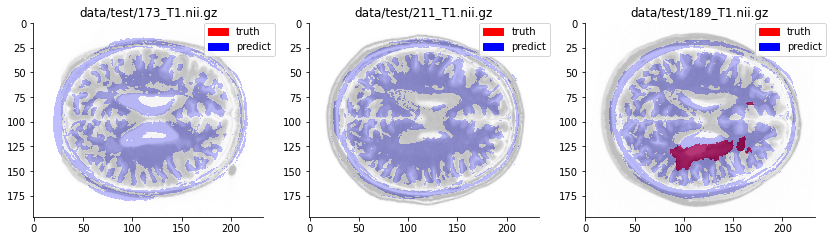

In [51]:
from matplotlib.patches import Patch
from matplotlib import colors


def plot_overlap_true_pred(ax, brain_img, true_mask, predicted_mask, title='overlap'):
    cmap_true = colors.ListedColormap(['white', 'red'])
    cmap_pred = colors.ListedColormap(['white','blue'])
    if np.all(predicted_mask == 1):
        cmap_pred = cmap_pred.reversed()
    ax.imshow(brain_img, cmap='Greys')
    ax.imshow(predicted_mask, cmap=cmap_pred,
               interpolation='none',
               alpha=0.5)
    ax.imshow(true_mask, cmap=cmap_true,
               interpolation='none',
               alpha=0.5)
    
    patches = []
    patches.append(Patch(color='red', label="truth"))
    patches.append(Patch(color='blue', label="predict"))
    ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0. )
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(title)

    
def load_images_and_plot(X_test, y_test, y_pred):
    f, axes = plt.subplots(1, len(X_test), figsize=(14, 8))
    z_axis_cut = 100
    for idx, brain_img_path in enumerate(X_test):
        # plot the test case
        brain_img = load_img(brain_img_path).get_fdata()
        plot_overlap_true_pred(
            ax = axes[idx],
            brain_img=brain_img[:, :, z_axis_cut],
            predicted_mask=y_pred[idx][:,:,z_axis_cut],
            true_mask=y_test[idx][:, :, z_axis_cut],
            title=f'{brain_img_path}')

        # print the size of the true and the predicted lesion
        print('Size of Truth is ',
              np.sum(y_test[idx]),
              ' vs ',
              np.sum(y_pred[idx]),
              ' of Predict. For ',
              brain_img_path)

load_images_and_plot(X_test, y_test, y_pred_features)

If you prefer to view it at another dimension you can change `z_axis_cut` parameter or define your own cut at `x` or `y` axis.

This is not an amazing result. Our model seems to be predicting some forms on the brain rather than the lesion. Still, let's calculate the scores:

In [52]:
dice_fext = dice_coeff(y_test, y_pred)
print(f'DiceCoeff for Feature Extractor algorithm is {np.round(dice_fext, 4)}')

DiceCoeff for Feature Extractor algorithm is 0.0036


In [33]:
precision_fext  = precision(y_test, y_pred)
print(f'Precision for Feature Extractor algorithm is {np.round(precision_fext, 4)}')

Precision for Feature Extractor algorithm is 0.0018


In [34]:
recall_fext  = recall(y_test, y_pred)
print(f'Recall for Feature Extractor algorithm is {np.round(recall_fext, 4)}')

Recall for Feature Extractor algorithm is 1.0


In [35]:
avd_fext  = avd(y_test, y_pred)
print(f'AbsoluteVolumeDifference for Feature Extractor algorithm is {np.round(avd_fext, 4)}')

AbsoluteVolumeDifference for Feature Extractor algorithm is 0.9982


## Deep Learning Dummy idea

When it comes to the 3D image segmentation deep learning algorithms are a frequent choice of consideration. Be careful not to be tricked into thinking that it might be the only working solution.

We will now try together a dummy shallow deep learning algorithm:

In [145]:
# %load submissions/deep_learn/estimator.py
import numpy as np
from sklearn.base import BaseEstimator
from keras import backend as K
from keras.layers.normalization import BatchNormalization
from keras.layers import Input, Conv3D, MaxPooling3D, Conv3DTranspose
from keras.layers import Concatenate
from keras import Model
from keras.optimizers import Adam
from rampwf.workflows.image_classifier import get_nb_minibatches
from sklearn.pipeline import Pipeline
from nilearn.image import load_img


def _dice_coefficient_loss(y_true, y_pred):
    return -_dice_coefficient(y_true, y_pred)

def _dice_coefficient(y_true, y_pred, smooth=1.):
        y_true_f = K.flatten(y_true)
        y_pred_f = K.flatten(y_pred)

        intersection = K.sum(y_true_f * y_pred_f)

        return ((2. * intersection + smooth) / (K.sum(y_true_f) +
                K.sum(y_pred_f) + smooth))
    

# Using the generator pattern (an iterable)
class ImageLoader():

    def __init__(self, X_paths, y=None):
        self.X_paths = X_paths
        self.n_paths = len(X_paths)
        self.y = y

    def __iter__(self):
        return self

    def __next__(self):
        return self.next()

    def load(self, img_index):
        img = load_img(self.X_paths[img_index]).get_fdata()
        print(img_index)
        if self.y is not None:
            return img, self.y[img_index]
        else:
            return img


class KerasSegmentationClassifier(BaseEstimator):
    def __init__(self, image_size):
        self.batch_size = 6
        self.xdim, self.ydim, self.zdim = image_size
        self.model = self.model_simple()

    def _build_train_generator(self, img_loader, indices, batch_size=1,
                               shuffle=False):
        indices = indices.copy()

        nb = len(indices)
        X = np.zeros((batch_size, self.xdim, self.ydim, self.zdim, 1))
        Y = np.zeros((batch_size, self.xdim, self.ydim, self.zdim, 1))

        while True:
            if shuffle:
                np.random.shuffle(indices)
            for start in range(0, nb, batch_size):
                stop = min(start + batch_size, nb)
                # load the next minibatch in memory.
                # The size of the minibatch is (stop - start),
                # which is `batch_size` for the all except the last
                # minibatch, which can either be `batch_size` if
                # `nb` is a multiple of `batch_size`, or `nb % batch_size`.
                bs = stop - start
                for i, img_index in enumerate(indices[start:stop]):
                    x, y = img_loader.load(img_index)
                    X[i] = x[:, :, :, np.newaxis]
                    Y[i] = y[:, :, :, np.newaxis]
                yield X[:bs], Y[:bs]

    def _build_test_generator(self, img_loader, batch_size=1):
        X = np.zeros((batch_size, self.xdim, self.ydim, self.zdim, 1))
        nb = img_loader.n_paths

        for start in range(0, nb, batch_size):
            stop = min(start + batch_size, nb)
            bs = stop - start
            for i, img_index in enumerate(range(start, stop)):
                x = img_loader.load(img_index)
                X[i] = x[:, :, :, np.newaxis]
            yield X[:bs]

    def fit(self, X, y):

        img_loader = ImageLoader(X, y)
        np.random.seed(42)
        nb = len(X)
        nb_train = int(nb * 0.9)
        nb_valid = nb - nb_train

        indices = np.arange(nb)
        np.random.shuffle(indices)

        ind_train = indices[0: nb_train]
        ind_valid = indices[nb_train:]

        gen_train = self._build_train_generator(
            img_loader,
            indices=ind_train,
            batch_size=self.batch_size,
            shuffle=True
        )
        gen_valid = self._build_train_generator(
            img_loader,
            indices=ind_valid,
            batch_size=self.batch_size,
            shuffle=True
        )

        self.model.fit(
            gen_train,
            steps_per_epoch=get_nb_minibatches(nb_train, self.batch_size),
            epochs=3,
            max_queue_size=1,
            workers=0,
            use_multiprocessing=False,
            validation_data=gen_valid,
            validation_steps=get_nb_minibatches(nb_valid, self.batch_size),
            verbose=1
        )

    def model_simple(self):
        # define a simple model
        inputs = Input((self.xdim, self.ydim, self.zdim, 1))
        down1conv1 = Conv3D(32, (6, 6, 6), activation='relu',
                            padding='same')(inputs)
        batch_norm = BatchNormalization()(down1conv1)
        output = Conv3D(1, (3, 3, 3), activation='sigmoid',
                            padding='same')(batch_norm)
        model = Model(inputs=inputs, outputs=output)
        model.compile(optimizer=Adam(lr=0.1), #'rmsprop',
                      loss=_dice_coefficient_loss, #'mean_squared_error',
                      metrics=[_dice_coefficient])
        print(model.summary())
        return model

    def predict(self, X):
        img_loader = ImageLoader(X)
        gen_test = self._build_test_generator(img_loader, self.batch_size)

        y_pred = self.model.predict(
            gen_test,
            batch_size=1
        )
        y_pred = (y_pred > 0.5) * 1
        # remove the last dim
        return y_pred[..., 0]


def get_estimator():
    image_size = (197, 233, 189)
    # initiate a deep learning algorithm
    deep = KerasSegmentationClassifier(image_size)

    pipeline = Pipeline([
        ('classifier', deep)
    ])

    return pipeline


Training the model with fit (in the starting kit example, we load some pretrained weights to be able to show results here, but note this is not possible for an actual submission):

In [146]:
deep_pipe = get_estimator()
deep_pipe.fit(X_train, y_train)

Model: "functional_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, 197, 233, 189, 1) 0         
_________________________________________________________________
conv3d_130 (Conv3D)          (None, 197, 233, 189, 32) 6944      
_________________________________________________________________
batch_normalization_18 (Batc (None, 197, 233, 189, 32) 128       
_________________________________________________________________
conv3d_131 (Conv3D)          (None, 197, 233, 189, 1)  865       
Total params: 7,937
Trainable params: 7,873
Non-trainable params: 64
_________________________________________________________________
None
1
Epoch 1/3
2/2 [==============================] - 26s 13s/step - loss: -0.0077 - _dice_coefficient: 0.0077 - val_loss: -2.6295e-04 - val__dice_coefficient: 2.6295e-04
Epoch 2/3
0
2/2 [==============================] - 28s 14s/step - loss: -0.

Pipeline(steps=[('classifier', KerasSegmentationClassifier(image_size=None))])

In [147]:
y_pred_deep = deep_pipe.predict(X_train)

0
1
2


In [148]:
np.unique(y_pred_deep)
print(y_pred_deep.shape)

(3, 197, 233, 189)


Size of Truth is  137.0  vs  3986496  of Predict. For  data/test/173_T1.nii.gz
Size of Truth is  184.0  vs  4923980  of Predict. For  data/test/211_T1.nii.gz
Size of Truth is  46580.0  vs  7520474  of Predict. For  data/test/189_T1.nii.gz


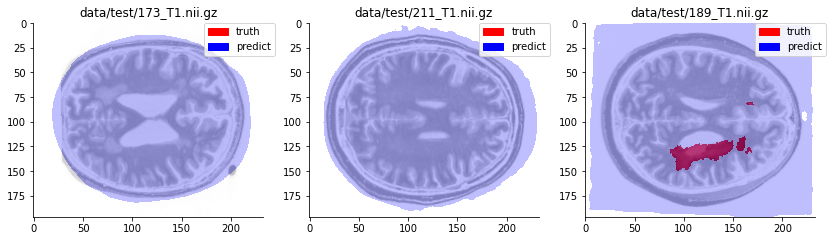

In [149]:
load_images_and_plot(X_test, y_test, y_pred_deep)

In [144]:
np.unique(y_pred_deep)

array([0, 1])

In [41]:
np.all(y_pred_deep[0] == y_pred_deep[1])

True

    predict few of the images

show the score

In [42]:
dice_fext = dice_coeff(y_test, y_pred)
print(f'DiceCoeff for Feature Extractor algorithm is {np.round(dice_fext, 4)}')

DiceCoeff for Feature Extractor algorithm is 0.0036


In [43]:
precision_fext  = precision(y_test, y_pred)
print(f'Precision for Feature Extractor algorithm is {np.round(precision_fext, 4)}')

Precision for Feature Extractor algorithm is 0.0018


In [44]:
recall_fext  = recall(y_test, y_pred)
print(f'Recall for Feature Extractor algorithm is {np.round(recall_fext, 4)}')

Recall for Feature Extractor algorithm is 1.0


In [45]:
avd_fext  = avd(y_test, y_pred)
print(f'AbsoluteVolumeDifference for Feature Extractor algorithm is {np.round(avd_fext, 4)}')

AbsoluteVolumeDifference for Feature Extractor algorithm is 0.9982


For the reference, if you wish to view previous medical image segmentation challenges:
    
- [Cada (Cerebral Aneurysm Detection) grand-challenge](https://cada.grand-challenge.org/)
- [Augmented Segmentation of Coronary Arteries](https://asoca.grand-challenge.org/)
- [TN (Thyroid Nodule Segmentation and Classification) SCUI2020](https://tn-scui2020.grand-challenge.org/)
- [Pneumothorax Segmentation SIIM-ACR](https://www.kaggle.com/c/siim-acr-pneumothorax-segmentation)
- [Brats brain tumor segmentation Challenge 2020](https://www.med.upenn.edu/cbica/brats2020/data.html)

## Submission <a class="anchor" id="Submission"></a> 

Once you found a good model you wish to test you should place it in a directory, naming it as you wish, and place it in the `submissions/` folder (you can already find there two submissions in the folders `submissions/starting_kit` and `submissions/sample` which we talked about above). The file placed in your submission directory (e.g., `starting_kit/` should be called `estimator.py` and should define a function called `get_estimator` that returns a scikit-learn type of pipeline.

You can then test your submission locally using the command:

`ramp-test --submission <your submission folder name>`

if you prefer to run a quick test on much smaller subset of data you can add `--quick-test` option:

`ramp-test --submission <your submission folder name> --quick-test`


For more information on how to submit your code on [ramp.studio](https://ramp.studio/), refer to the [online documentation](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html).